## MLPClassifier

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, StratifiedShuffleSplit

In [2]:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X = X.to_numpy()
y = y.to_numpy()
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# Flatten each input image into a vector of length 784
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

In [6]:
# Normalizing
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Fit MLPCLassifier with 1 hidden layer with 128 neurons.

In [8]:
mlpc = MLPClassifier(hidden_layer_sizes=(128,))
mlpc.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128,))

In [9]:
cv_score = cross_val_score(mlpc, X_train, y_train, cv=cv)
print(cv_score.mean() * 100)

97.75333333333333


In [10]:
mlpc.predict_proba(X_test[:5]) # probabilities for first 5 samples, on each of the 10 digits.

array([[9.97688744e-12, 5.13810611e-18, 3.90536592e-08, 2.13884340e-06,
        1.07230899e-16, 1.62946937e-11, 2.78675161e-22, 9.99997804e-01,
        3.86549227e-09, 1.40391358e-08],
       [1.47035633e-14, 3.39065587e-09, 9.99999997e-01, 1.22538396e-11,
        7.87703608e-34, 2.77913150e-11, 2.22072561e-13, 1.02140216e-24,
        1.45643565e-11, 2.21465025e-21],
       [1.33279315e-10, 9.99955139e-01, 8.35561323e-07, 1.11450011e-08,
        4.93778913e-09, 1.37681017e-09, 3.99319996e-08, 1.83463025e-07,
        4.37839604e-05, 2.51463508e-11],
       [1.00000000e+00, 2.50128956e-20, 2.11394084e-10, 6.16529835e-17,
        2.30986217e-21, 4.55320146e-14, 9.46270239e-11, 1.95077904e-12,
        9.31331761e-20, 5.28461819e-14],
       [3.59692406e-12, 3.57419208e-17, 6.34329927e-10, 9.31996618e-14,
        9.99977787e-01, 3.57980068e-15, 2.23798403e-11, 1.86769493e-07,
        6.40265367e-12, 2.20252584e-05]])

In [11]:
accuracy_score(y_train, mlpc.predict(X_train))

1.0

In [12]:
accuracy_score(y_test, mlpc.predict(X_test))

0.9798

In [13]:
print(classification_report(y_test, mlpc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(0.5, 1.0, 'Loss curve')

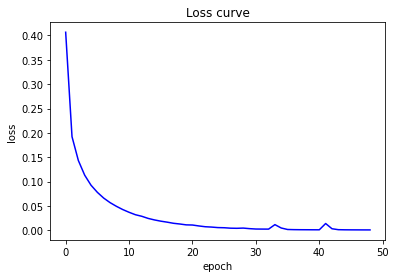

In [14]:
plt.plot(mlpc.loss_curve_, 'b-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss curve')

## MLP Regressor

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit

In [16]:
np.random.seed(306)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [17]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [19]:
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', MLPRegressor(hidden_layer_sizes=(32)))])

cv_results = cross_validate(pipe, X_train, y_train, cv=cv, scoring='neg_mean_absolute_percentage_error', return_train_score=True, return_estimator=True)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [20]:
mlp_train_error = -1 * cv_results['train_score']
mlp_test_error = -1 * cv_results['test_score']

print(f'training score: {mlp_train_error.mean():.3f} +/- {mlp_train_error.std():0.3f}')
print(f'testing score: {mlp_test_error.mean():.3f} +/- {mlp_test_error.std():0.3f}')

training score: 0.212 +/- 0.004
testing score: 0.213 +/- 0.007


In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', MLPRegressor(hidden_layer_sizes=32))])

In [22]:
print(mean_absolute_percentage_error(y_train, pipe.predict(X_train)))
print(mean_absolute_percentage_error(y_test, pipe.predict(X_test)))

0.21340591025907124
0.2239511709028533


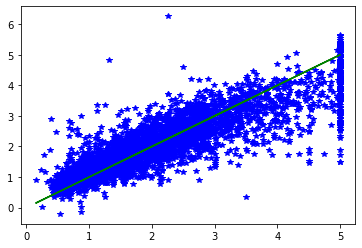

In [23]:
plt.plot(y_test, pipe.predict(X_test), 'b*')
plt.plot(y_test, y_test, 'g-')